In [1]:
from roboflow import Roboflow
from ultralytics import YOLO

In [2]:
import os
HOME = os.getcwd()
print(HOME)

d:\d7thSemesterUniversity\PBL06\baby-pose-detection\face-classification


In [3]:
from IPython import display
display.clear_output()

from IPython.display import display, Image

import ultralytics
ultralytics.checks()

Ultralytics 8.3.38  Python-3.11.3 torch-2.3.1+cpu CPU (11th Gen Intel Core(TM) i3-1115G4 3.00GHz)
Setup complete  (4 CPUs, 7.7 GB RAM, 73.4/82.8 GB disk)


# Load data

In [4]:
rf = Roboflow(api_key="kUOwYkxbJ5jzpypyha95")
project = rf.workspace("learning-ai-kyix0").project("face-classification-keusz")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.3.38, to fix: `pip install ultralytics==8.0.196`


In [5]:
dataset.location

'd:\\d7thSemesterUniversity\\PBL06\\baby-pose-detection\\face-classification\\Face-classification-1'

# Training

In [6]:
model = YOLO("yolov8s.pt")
model.train(
    data=str(dataset.location + "/data.yaml"),
    epochs=1,
    imgsz=640,
    project=HOME,
    name="face_classification"
)

New https://pypi.org/project/ultralytics/8.3.39 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.38  Python-3.11.3 torch-2.3.1+cpu CPU (11th Gen Intel Core(TM) i3-1115G4 3.00GHz)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=d:\d7thSemesterUniversity\PBL06\baby-pose-detection\face-classification\Face-classification-1/data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=d:\d7thSemesterUniversity\PBL06\baby-pose-detection\face-classification, name=face_classification, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True

train: Scanning D:\d7thSemesterUniversity\PBL06\baby-pose-detection\face-classification\Face-classification-1\train\labels.cache... 136 images, 1 backgrounds, 0 corrupt: 100%|██████████| 136/136 [00:00<?, ?it/s]
val: Scanning D:\d7thSemesterUniversity\PBL06\baby-pose-detection\face-classification\Face-classification-1\valid\labels.cache... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]


Plotting labels to d:\d7thSemesterUniversity\PBL06\baby-pose-detection\face-classification\face_classification\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to d:\d7thSemesterUniversity\PBL06\baby-pose-detection\face-classification\face_classification
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G       1.32      4.013      1.492          7        640: 100%|██████████| 9/9 [04:30<00:00, 30.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING  NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.90s/it]


                   all         39         39      0.571      0.444      0.419       0.34

1 epochs completed in 0.084 hours.
Optimizer stripped from d:\d7thSemesterUniversity\PBL06\baby-pose-detection\face-classification\face_classification\weights\last.pt, 22.5MB
Optimizer stripped from d:\d7thSemesterUniversity\PBL06\baby-pose-detection\face-classification\face_classification\weights\best.pt, 22.5MB

Validating d:\d7thSemesterUniversity\PBL06\baby-pose-detection\face-classification\face_classification\weights\best.pt...
Ultralytics 8.3.38  Python-3.11.3 torch-2.3.1+cpu CPU (11th Gen Intel Core(TM) i3-1115G4 3.00GHz)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING  NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:23<00:00, 11.69s/it]


                   all         39         39      0.566       0.42        0.4      0.323
            face-downs         21         21      0.726      0.507      0.481      0.369
        not-face-downs         18         18      0.406      0.333      0.318      0.277
Speed: 3.4ms preprocess, 446.2ms inference, 0.0ms loss, 142.0ms postprocess per image
Results saved to d:\d7thSemesterUniversity\PBL06\baby-pose-detection\face-classification\face_classification


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000243895F4050>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

In [7]:
HOME

'd:\\d7thSemesterUniversity\\PBL06\\baby-pose-detection\\face-classification'

d:\d7thSemesterUniversity\PBL06\baby-pose-detection\face-classification


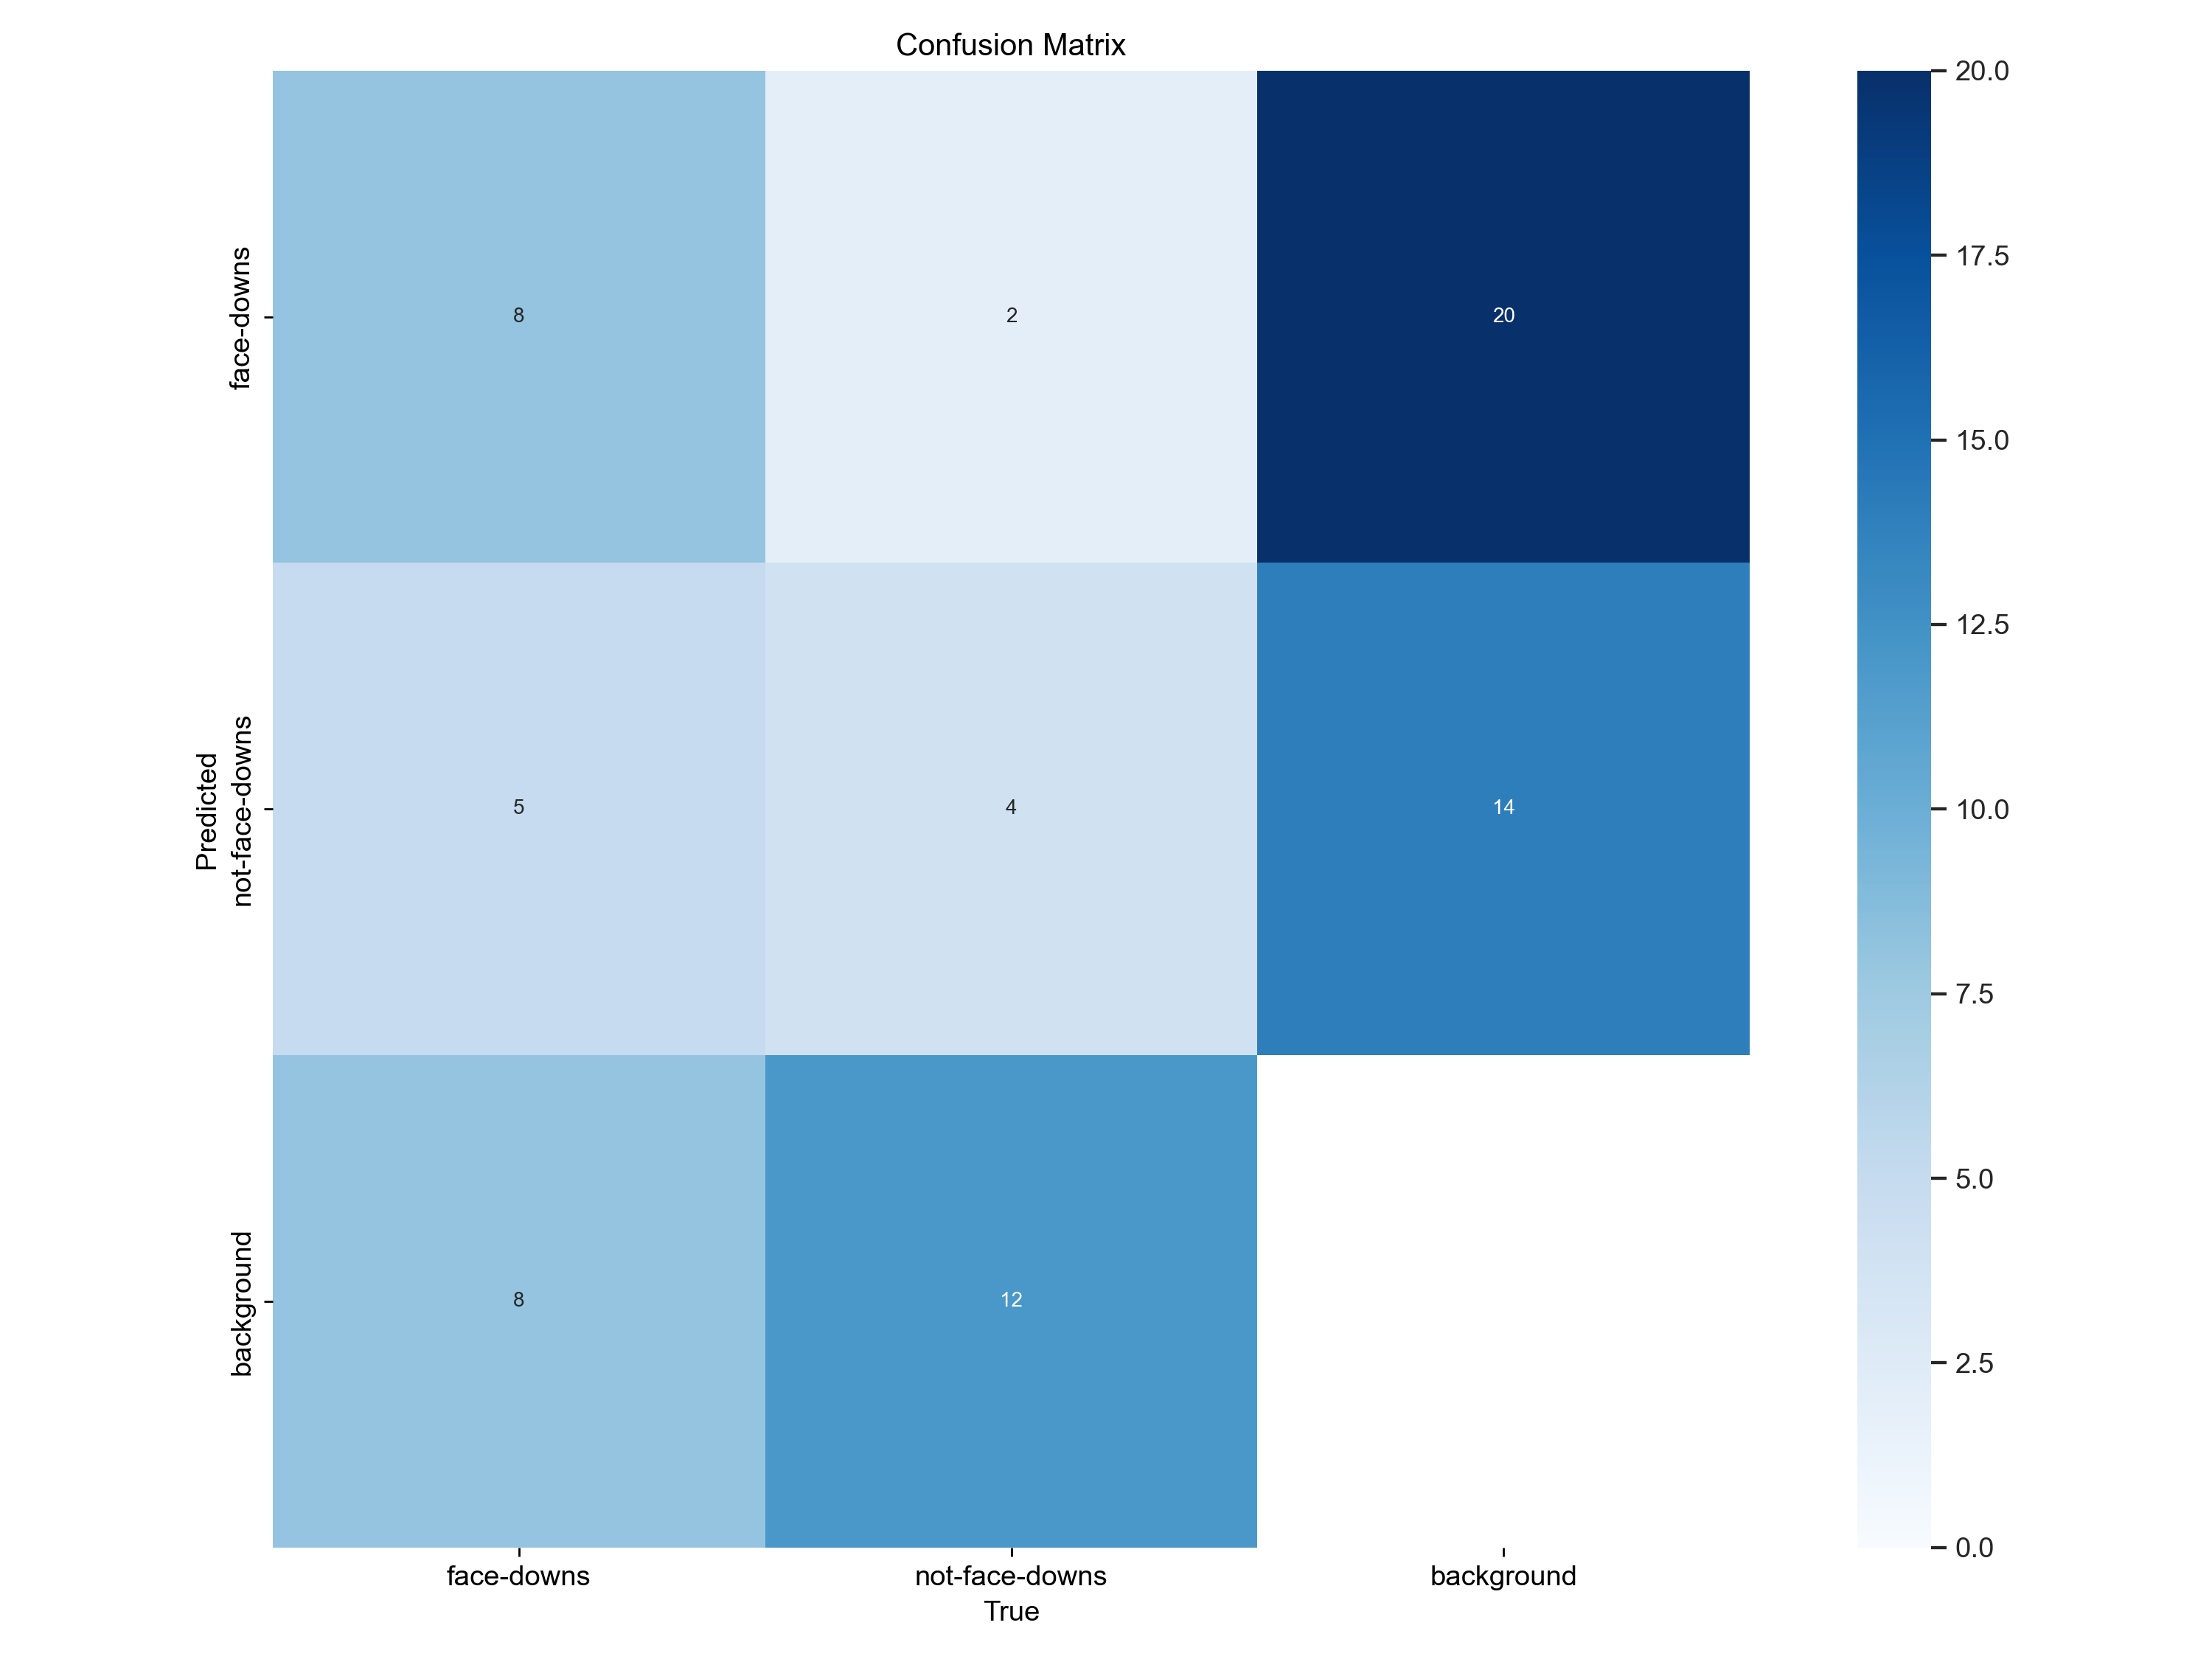

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/face_classification/confusion_matrix.png', width=600)

d:\d7thSemesterUniversity\PBL06\baby-pose-detection\face-classification


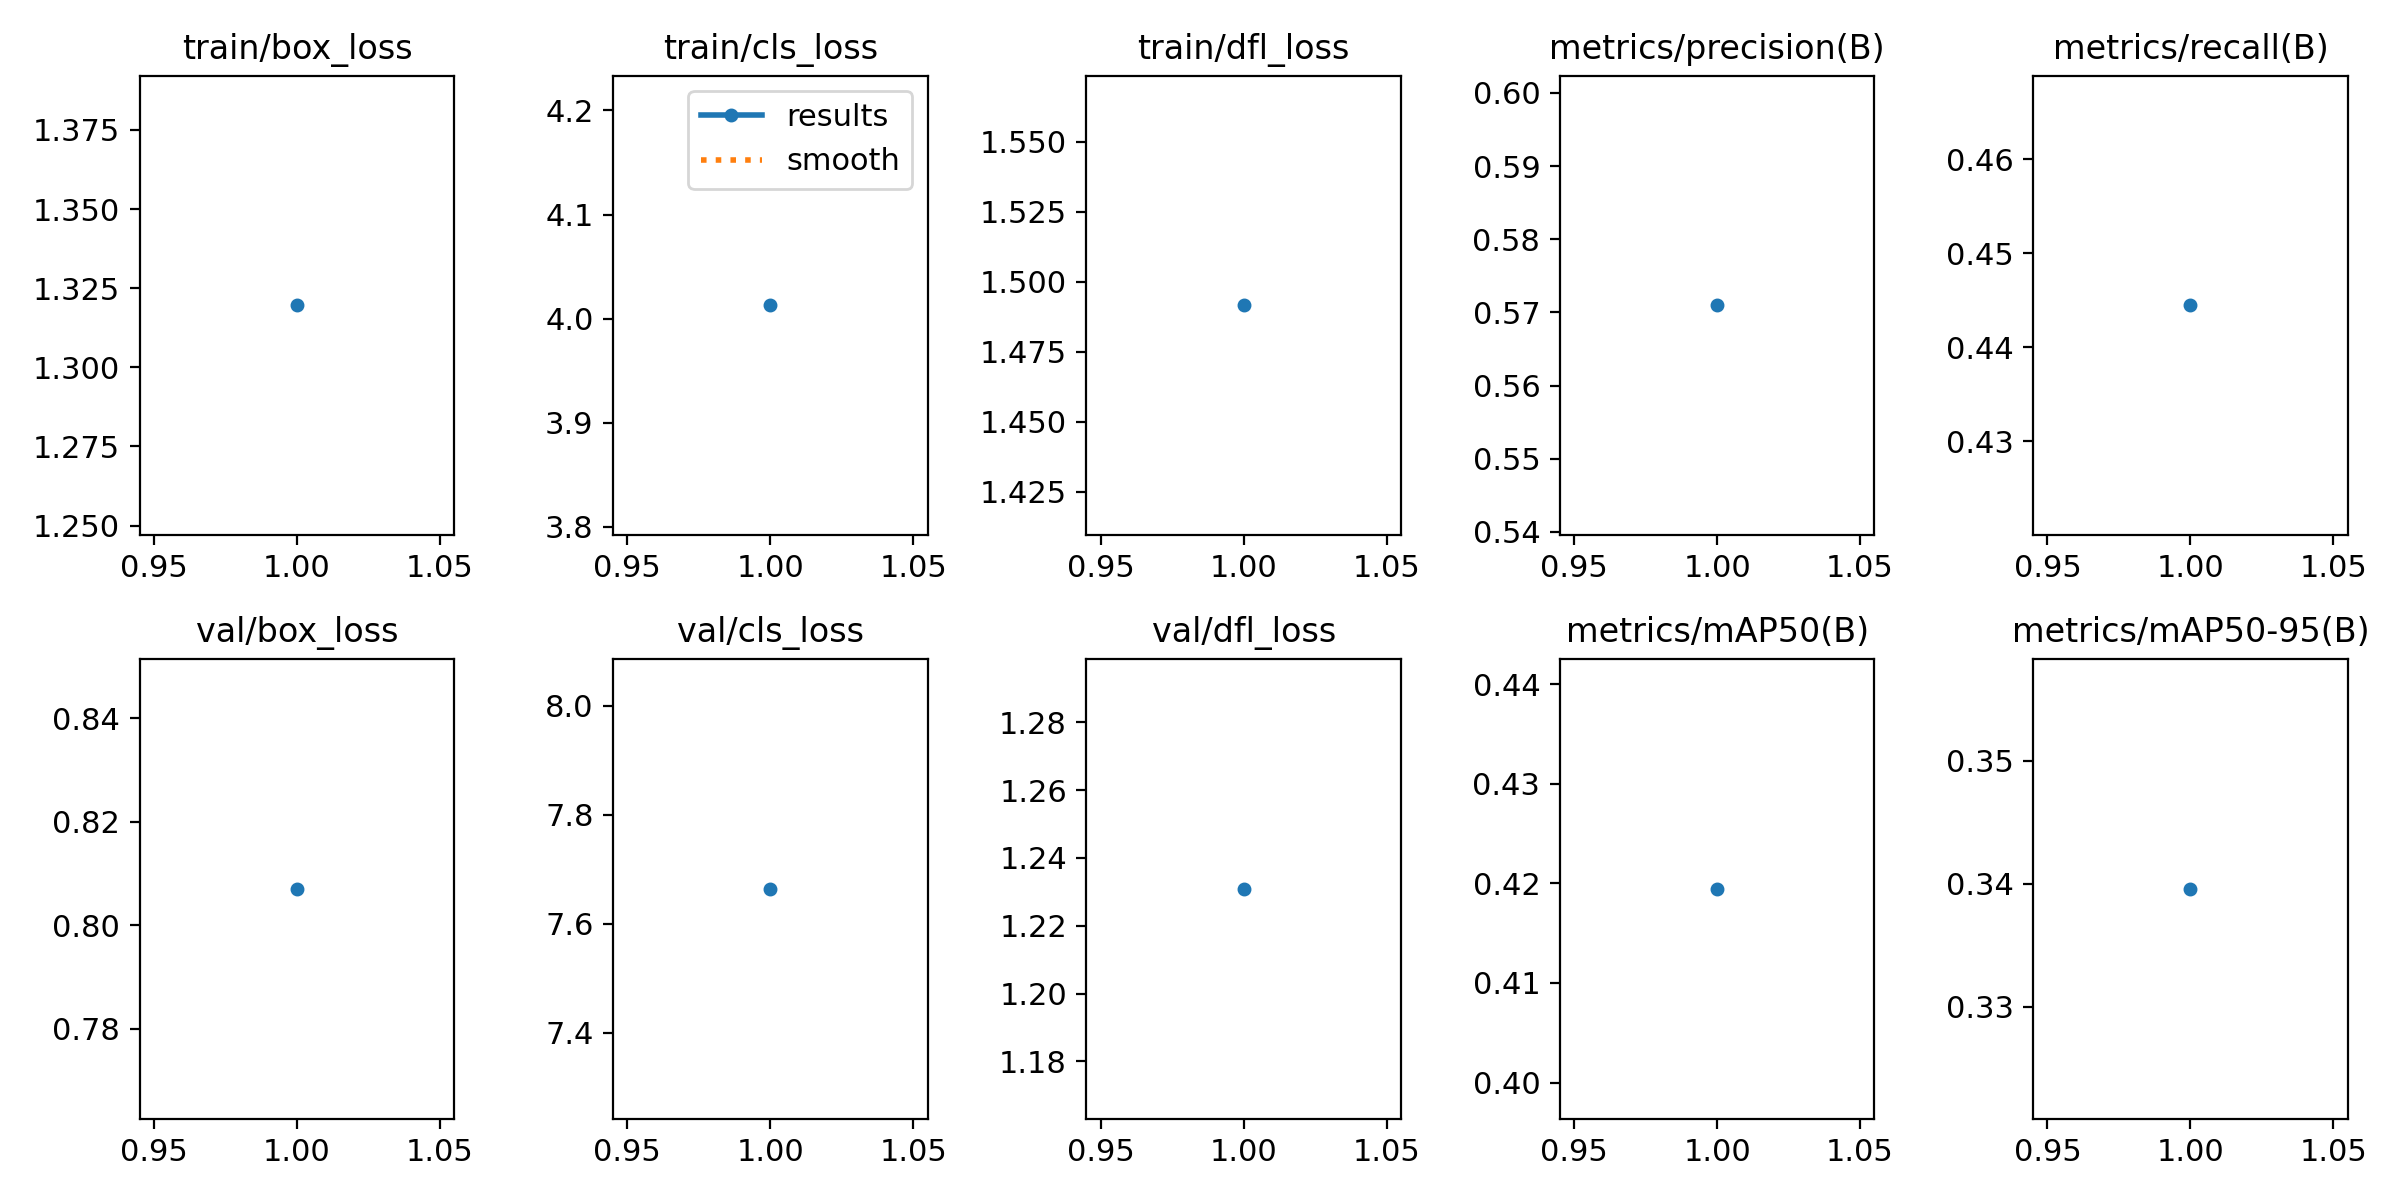

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/face_classification/results.png', width=600)

d:\d7thSemesterUniversity\PBL06\baby-pose-detection\face-classification


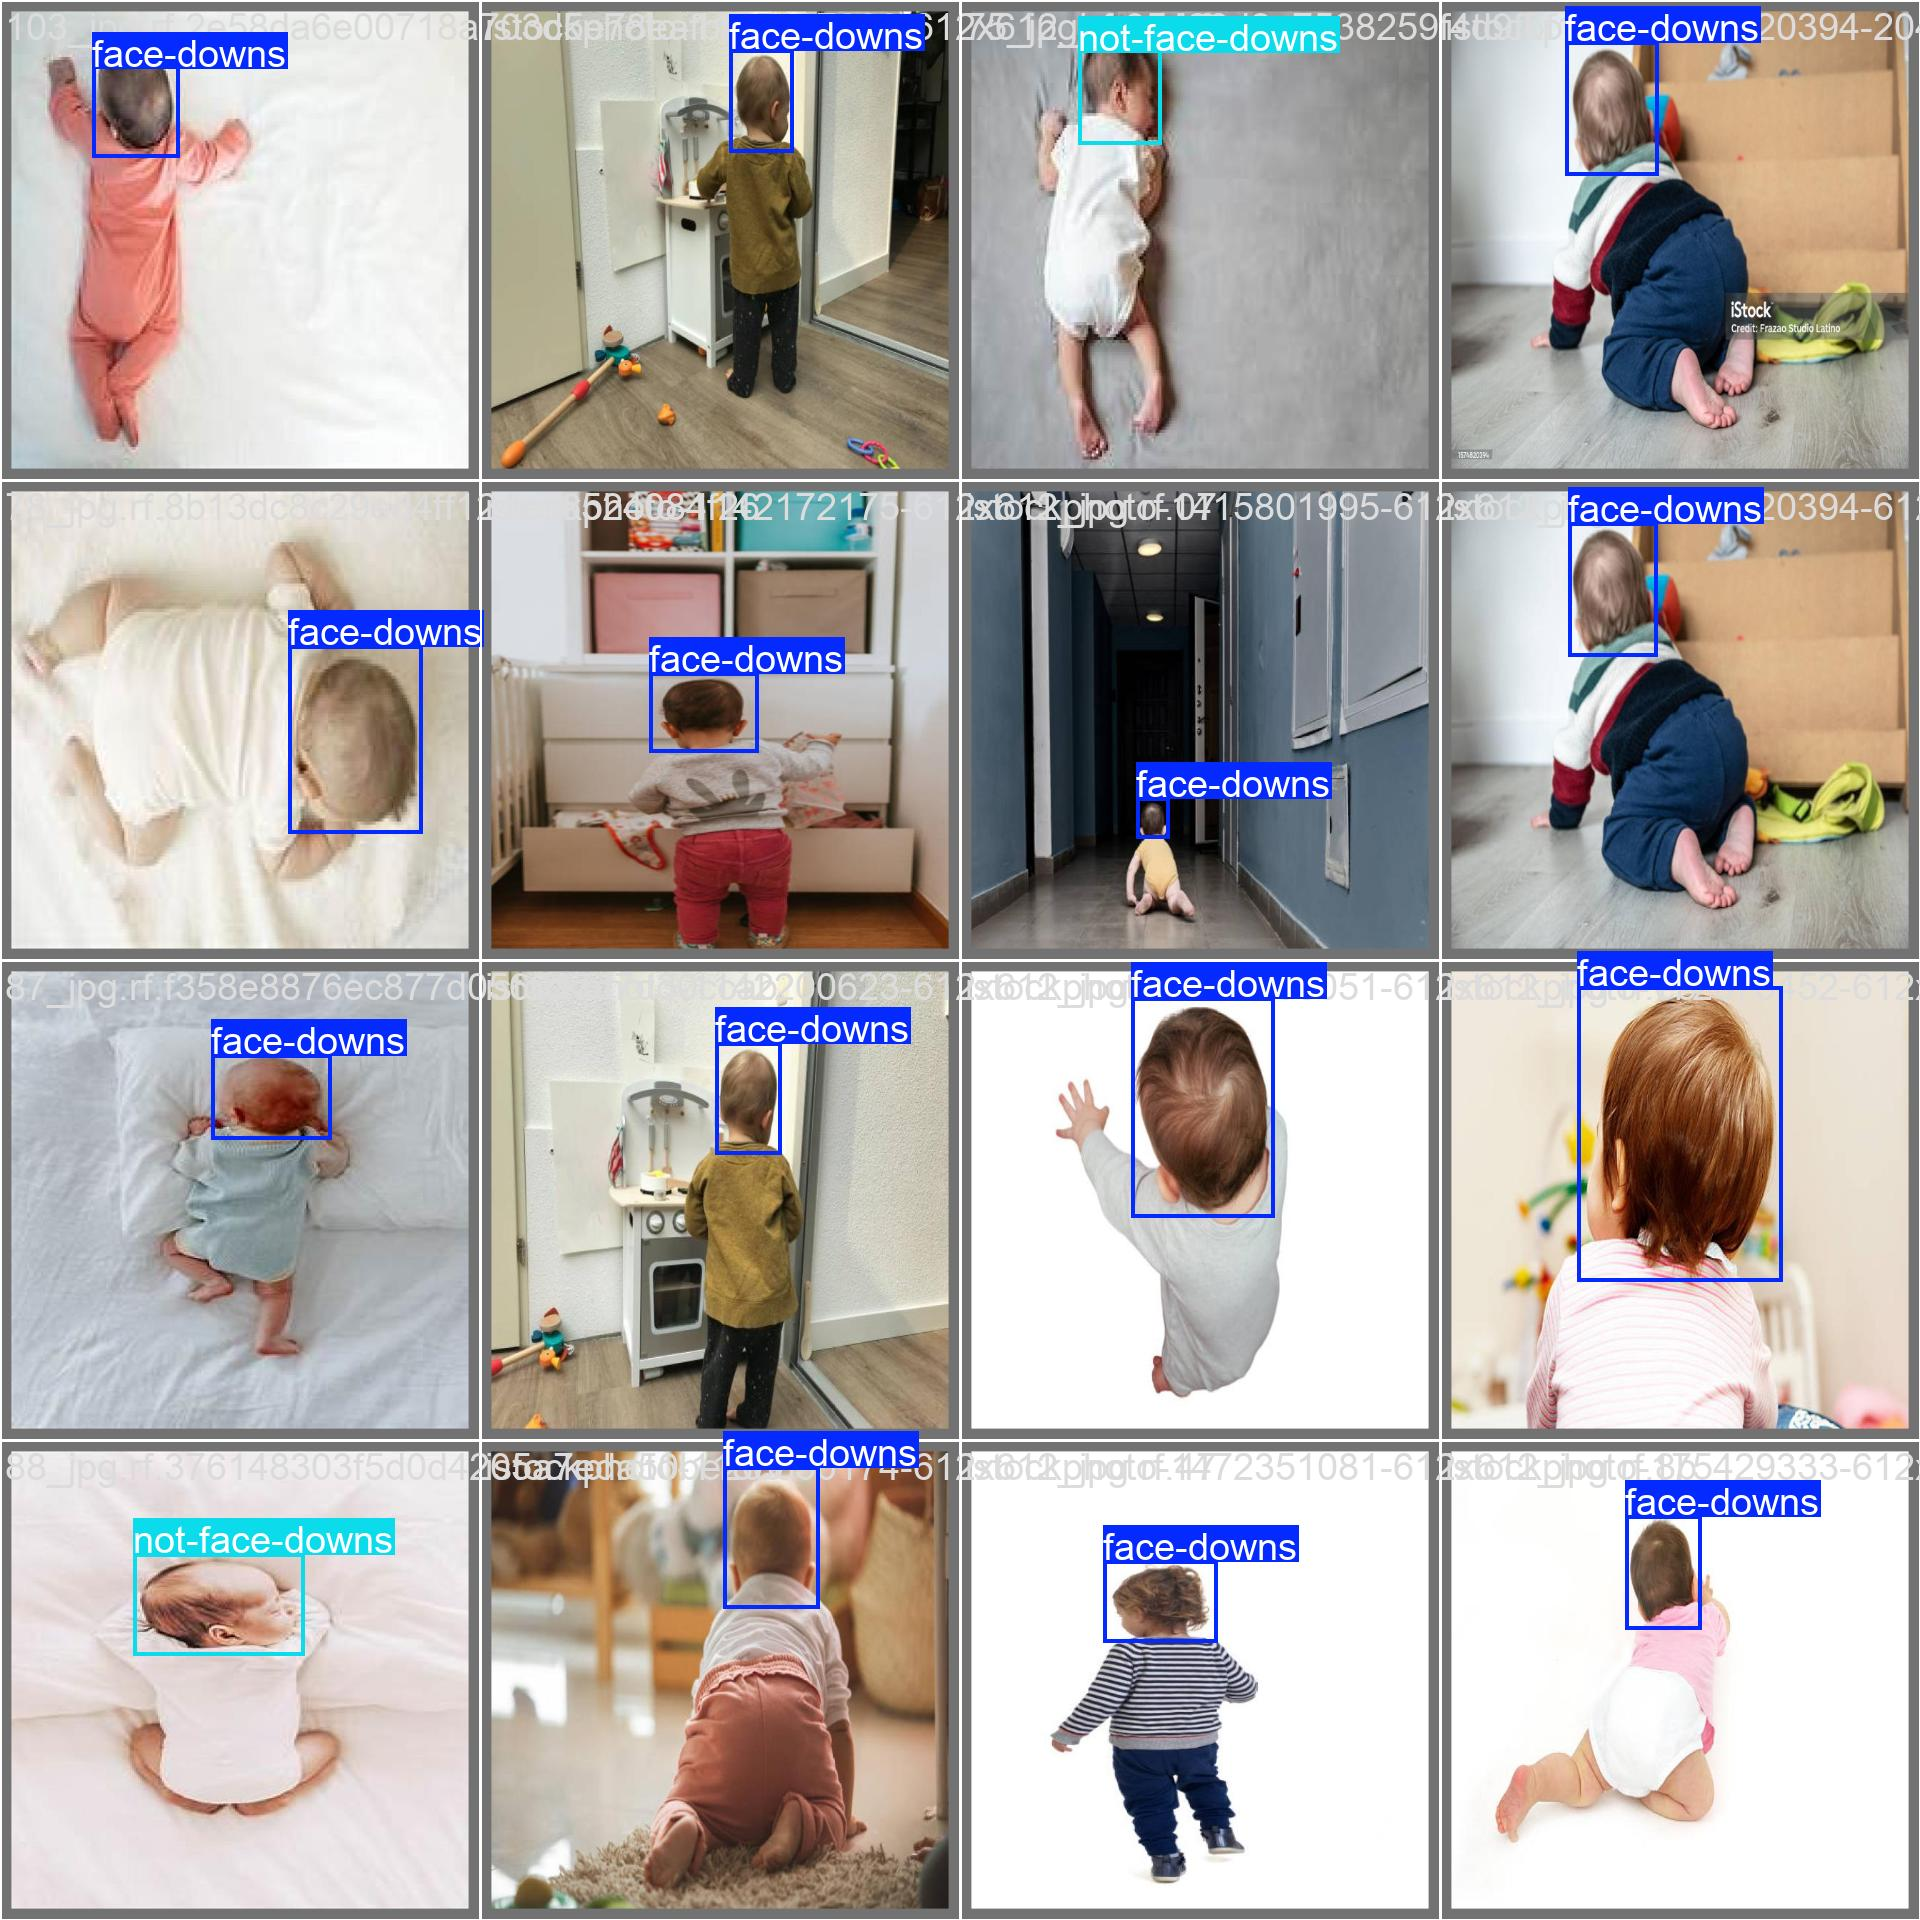

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/face_classification/val_batch0_labels.jpg', width=600)

In [12]:
best_model = YOLO("./face_classification/weights/best.pt")

best_model.val(data=str(dataset.location + "/data.yaml"))

Ultralytics 8.3.38  Python-3.11.3 torch-2.3.1+cpu CPU (11th Gen Intel Core(TM) i3-1115G4 3.00GHz)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning D:\d7thSemesterUniversity\PBL06\baby-pose-detection\face-classification\Face-classification-1\valid\labels.cache... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING  NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [00:09<00:19,  9.78s/it]

WARNING  NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.12s/it]


                   all         39         39      0.554      0.563      0.499      0.406
            face-downs         21         21      0.626      0.571      0.482      0.375
        not-face-downs         18         18      0.482      0.556      0.516      0.436
Speed: 4.0ms preprocess, 408.2ms inference, 0.0ms loss, 198.6ms postprocess per image
Results saved to d:\d7thSemesterUniversity\IoT\IoT\runs\detect\val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000243F8EC02D0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

In [15]:
results = best_model.predict(source=str(dataset.location + "/test/images"), conf=0.25, save=True, project=HOME, name="test_results")


image 1/19 d:\d7thSemesterUniversity\PBL06\baby-pose-detection\face-classification\Face-classification-1\test\images\109_jpg.rf.09521225fe7198295d9edefc1a645b41.jpg: 640x640 3 not-face-downss, 452.9ms
image 2/19 d:\d7thSemesterUniversity\PBL06\baby-pose-detection\face-classification\Face-classification-1\test\images\117_jpg.rf.295dfc0f823b24ac241ced3d9940e3de.jpg: 640x640 2 not-face-downss, 382.1ms
image 3/19 d:\d7thSemesterUniversity\PBL06\baby-pose-detection\face-classification\Face-classification-1\test\images\11_jpg.rf.b85fe62432193a5945c1597a88c4fec9.jpg: 640x640 2 face-downss, 2 not-face-downss, 499.1ms
image 4/19 d:\d7thSemesterUniversity\PBL06\baby-pose-detection\face-classification\Face-classification-1\test\images\124_jpg.rf.6f64f2a1ade3d4c415a04d794da3a3f2.jpg: 640x640 (no detections), 354.0ms
image 5/19 d:\d7thSemesterUniversity\PBL06\baby-pose-detection\face-classification\Face-classification-1\test\images\132_jpg.rf.f5f9acedce6a6c2af43b37061eb6b176.jpg: 640x640 1 not-fac

In [16]:
for r in results:
    print(r.boxes.data)

tensor([[2.3765e+02, 5.9958e+01, 3.6716e+02, 2.4800e+02, 9.9936e-01, 1.0000e+00],
        [2.7962e+02, 6.0325e+01, 3.7014e+02, 2.4576e+02, 4.3944e-01, 1.0000e+00],
        [3.1367e+02, 5.8763e+01, 4.0725e+02, 2.0627e+02, 3.8030e-01, 1.0000e+00]])
tensor([[2.2778e+02, 3.4854e+01, 3.3191e+02, 2.3717e+02, 7.7924e-01, 1.0000e+00],
        [4.3515e+02, 1.8138e+02, 5.7044e+02, 3.9940e+02, 3.2336e-01, 1.0000e+00]])
tensor([[4.3094e+02, 2.2876e+02, 5.9371e+02, 4.5976e+02, 7.9055e-01, 1.0000e+00],
        [3.7320e+02, 1.6028e+02, 4.9505e+02, 2.6598e+02, 7.4916e-01, 1.0000e+00],
        [3.7406e+02, 1.6095e+02, 4.9677e+02, 2.6323e+02, 3.6393e-01, 0.0000e+00],
        [9.4833e+01, 1.8934e+02, 2.6367e+02, 3.1177e+02, 3.2564e-01, 0.0000e+00]])
tensor([], size=(0, 6))
tensor([[107.4970, 265.2173, 204.0908, 431.7200,   0.7537,   1.0000]])
tensor([[3.9866e+02, 1.2970e+02, 5.3612e+02, 3.4519e+02, 9.7149e-01, 1.0000e+00],
        [4.0010e+02, 1.3462e+02, 5.3586e+02, 3.4814e+02, 3.4717e-01, 0.0000e+00]])